In [29]:
! ls data/
from scipy.io import wavfile
import scipy.fftpack
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

ch1-2018-11-20_10-42-38_0000021.wav  dlaUJ_VPAmodel_koh3_tickling_20190328.txt


#  Load annotations #

In [3]:
annotations = pd.read_csv('./data/dlaUJ_VPAmodel_koh3_tickling_20190328.txt', delimiter="\t", index_col='Selection')
annotations.head()

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
1,Spectrogram 1,1,3.906449,4.897027,0.991,19622.1,27374.0,22460.9,23925.8,ch1-2018-11-20_10-17-43_0000004.wav,7751.9,22-kHz
2,Spectrogram 1,1,4.982955,5.587635,0.605,19622.1,24951.6,21484.4,21972.7,ch1-2018-11-20_10-17-43_0000004.wav,5329.5,22-kHz call
3,Spectrogram 1,1,5.691707,5.926661,0.235,21075.6,24709.3,22949.2,24414.1,ch1-2018-11-20_10-17-43_0000004.wav,3633.7,22-kHz call
4,Spectrogram 1,1,6.178659,6.742458,0.564,19864.3,23740.3,21972.7,23437.5,ch1-2018-11-20_10-17-43_0000004.wav,3876.0,22-kHz call
5,Spectrogram 1,1,7.165841,7.683367,0.518,19864.3,23498.1,21484.4,21972.7,ch1-2018-11-20_10-17-43_0000004.wav,3633.8,22-kHz call


## Annotations types `USV TYPE` ##

In [8]:
annotations['USV TYPE'].unique()

array(['22-kHz', '22-kHz call', 'SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU',
       'TR', 'RM'], dtype=object)

In [13]:
counts = annotations.groupby('USV TYPE').count()['View']
counts

USV TYPE
22-kHz           1
22-kHz call     97
CMP            294
FL             379
FM             581
IU              28
RM               2
RP             175
SH             291
ST             458
TR             543
Name: View, dtype: int64

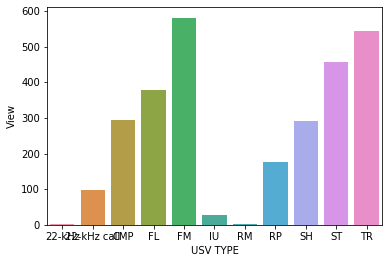

In [20]:
sns.barplot(counts.index, counts)

## Delta Time ##

count    2849.000000
mean        0.075145
std         0.113260
min         0.003000
25%         0.026000
50%         0.046000
75%         0.077000
max         1.317000
Name: Delta Time (s), dtype: float64

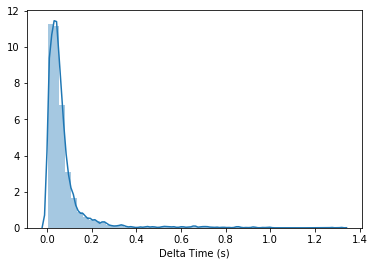

In [26]:
sns.distplot(annotations['Delta Time (s)'])
annotations['Delta Time (s)'].describe()

## Low/High Freq ##

count     2849.000000
mean     43730.375641
std      13197.966715
min      18203.900000
25%      32843.100000
50%      44520.500000
75%      53336.500000
max      95445.700000
Name: Low Freq (Hz), dtype: float64

count      2849.000000
mean      61483.229730
std       15554.806315
min       23058.300000
25%       52475.200000
50%       61088.300000
75%       70714.300000
max      119832.700000
Name: High Freq (Hz), dtype: float64

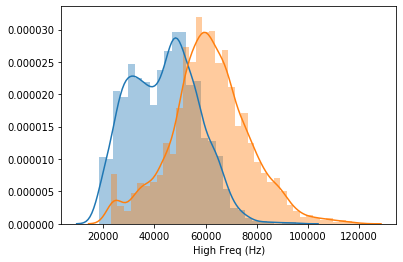

In [32]:
sns.distplot(annotations['Low Freq (Hz)'])
display(annotations['Low Freq (Hz)'].describe())


sns.distplot(annotations['High Freq (Hz)'])
display(annotations['High Freq (Hz)'].describe())


# Analize single data file #

In [4]:
ann = annotations[annotations['Begin File'] == 'ch1-2018-11-20_10-42-38_0000021.wav']
ann

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
2721,Spectrogram 1,1,961.626661,961.646652,0.020,56981.5,65451.7,63476.6,63476.6,ch1-2018-11-20_10-42-38_0000021.wav,8470.2,TR
2722,Spectrogram 1,1,962.907771,962.956739,0.049,50308.0,53901.4,52246.1,51757.8,ch1-2018-11-20_10-42-38_0000021.wav,3593.4,FL
2723,Spectrogram 1,1,964.634353,964.665800,0.031,65708.4,76232.0,72265.6,72265.6,ch1-2018-11-20_10-42-38_0000021.wav,10523.6,FM
2724,Spectrogram 1,1,964.766430,964.772271,0.006,57238.2,62885.0,61523.4,61035.2,ch1-2018-11-20_10-42-38_0000021.wav,5646.8,SH
2725,Spectrogram 1,1,965.863053,965.869791,0.007,56211.5,59291.6,58105.5,58105.5,ch1-2018-11-20_10-42-38_0000021.wav,3080.1,SH
...,...,...,...,...,...,...,...,...,...,...,...,...
2845,Spectrogram 1,1,1078.783906,1078.791993,0.008,59291.6,67248.5,65918.0,65918.0,ch1-2018-11-20_10-42-38_0000021.wav,7956.9,RP
2846,Spectrogram 1,1,1079.182703,1079.224033,0.041,53644.8,66221.8,62988.3,62500.0,ch1-2018-11-20_10-42-38_0000021.wav,12577.0,TR
2847,Spectrogram 1,1,1079.494477,1079.547487,0.053,53131.4,69301.8,65429.7,62988.3,ch1-2018-11-20_10-42-38_0000021.wav,16170.4,TR


In [65]:
x = np.linspace(961, 1080, 10000)
y = []
i = 0
# print(ann.iloc[0])
for xv in x:
    value = None
    while i < len(ann):
        if xv > ann.iloc[i]['End Time (s)']:
            i += 1
            continue
        if xv >= ann.iloc[i]['Begin Time (s)']:
            value = ann.iloc[i]['USV TYPE']
        break
    y.append(value)
    
print(x.shape, len(y))


(10000,) 10000


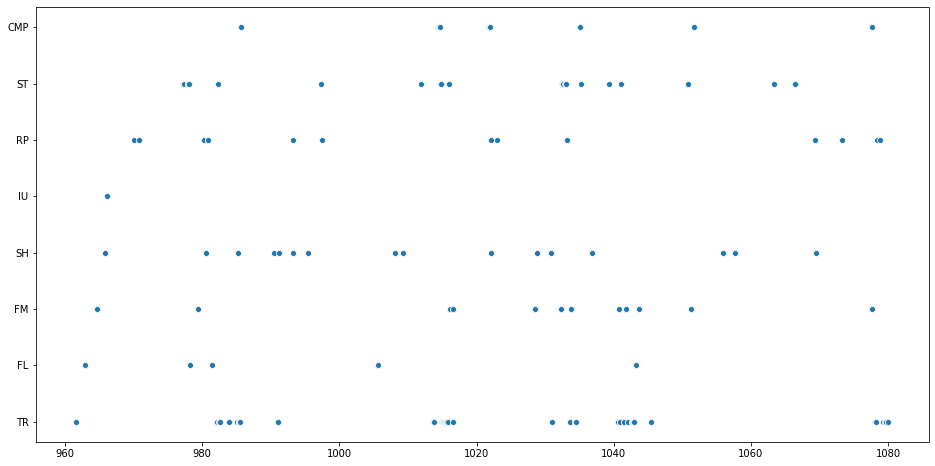

In [67]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x, y)

# Load recording #

In [68]:
fs, data = wavfile.read('./data/ch1-2018-11-20_10-42-38_0000021.wav')
print(fs, data.shape)

250000 (30001224,)


/home/solmyr/Codes/studia/2019-2020-winter/ml2019-20/.env/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


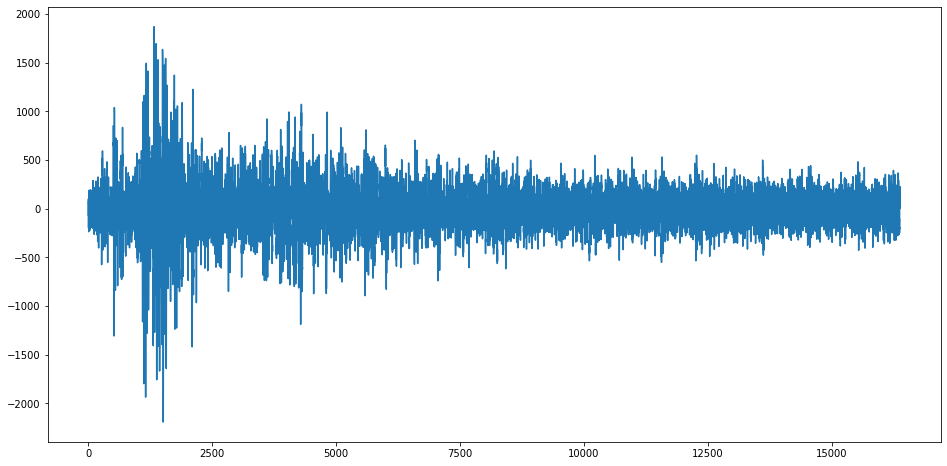

In [91]:
window_size = 2**14

offset = 179346
# offset = 1619072

frame = data[offset:offset+window_size]
plt.figure(figsize=(16, 8))
sns.lineplot(np.arange(window_size), frame)


/home/solmyr/Codes/studia/2019-2020-winter/ml2019-20/.env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


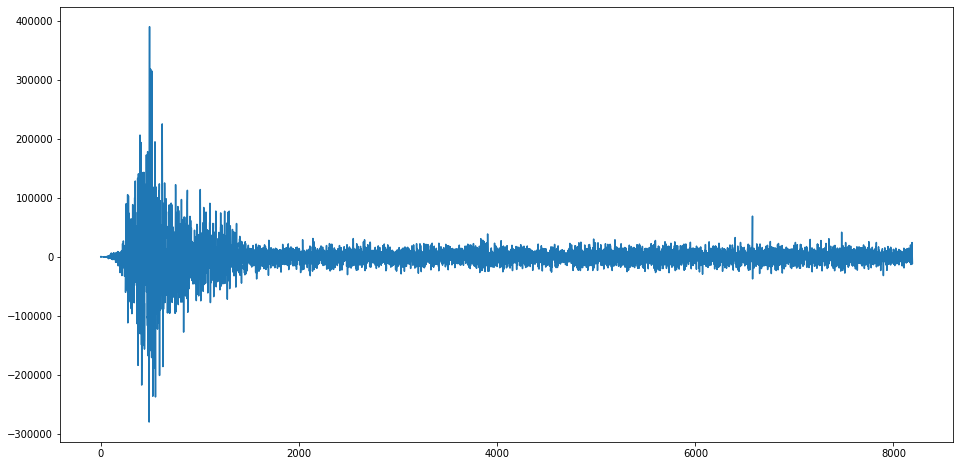

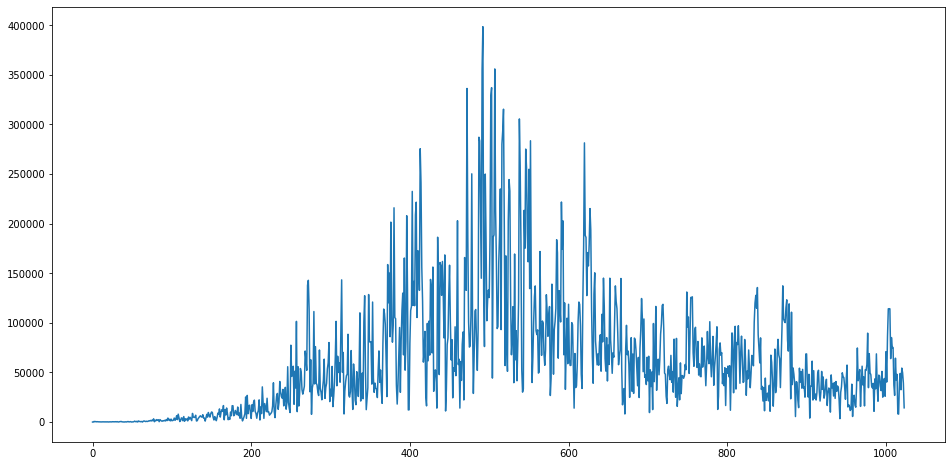

In [92]:
# https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
yf = scipy.fftpack.fft(frame)

# plot whole FFT
plt.figure(figsize=(16, 8))
sns.lineplot(np.arange(window_size//2), yf[:window_size//2])

# plot begining of FFT
plt.figure(figsize=(16, 8))
sns.lineplot(np.arange(1024), np.abs(yf[:1024]))